In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import random
%matplotlib inline

запишем разные примеры сопряженных к Бернуллиевскому распределений

In [2]:
beta_distr = []
beta_distr.append(scipy.stats.beta(1, 100))
beta_distr.append(scipy.stats.beta(0.5, 0.5))
beta_distr.append(scipy.stats.beta(5, 1))
beta_distr.append(scipy.stats.beta(1, 3))
beta_distr.append(scipy.stats.beta(2, 2))
beta_distr.append(scipy.stats.beta(2, 5))
beta_distr.append(scipy.stats.beta(10, 10))
beta_distr.append(scipy.stats.beta(100, 1))

In [3]:
dists_parameters=[[1, 100], [0.5,0.5],[5,1],[1,3],[2,2], [2,5],[10,10],[100,1]]

In [4]:
symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
def color_generator():
    color = '#'
    for i in range(6):
        index = 0
        for j in xrange(1000) :
            index = random.randint(0, 15)
        color += (symbols[index])
    return color

In [5]:
dots = np.linspace(0, 1, 2000)

Далее, нарисуем графики их плотностей(по-отдельности и вместе взятых)

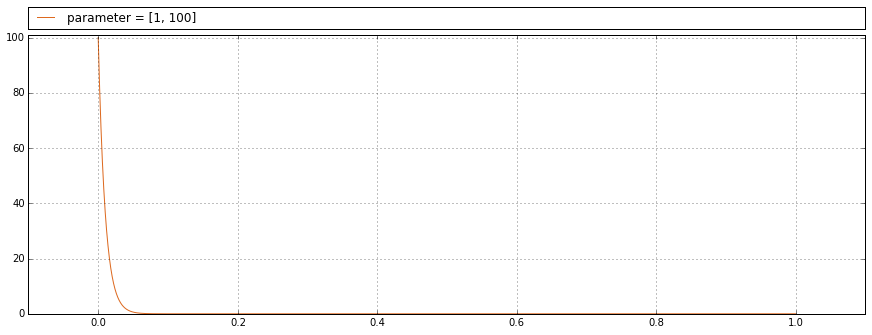

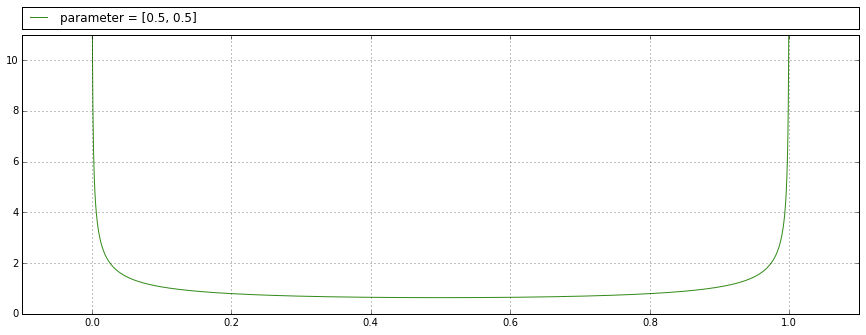

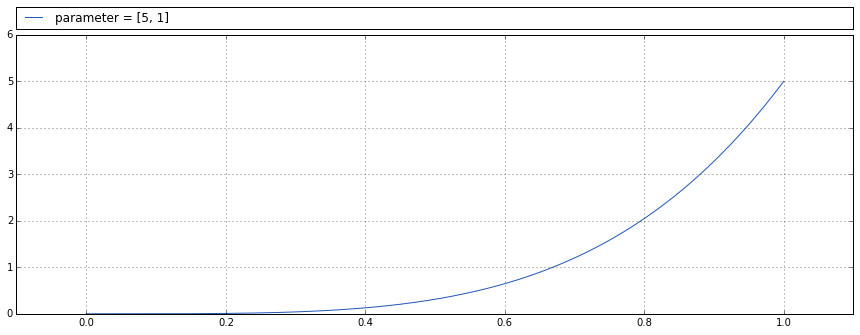

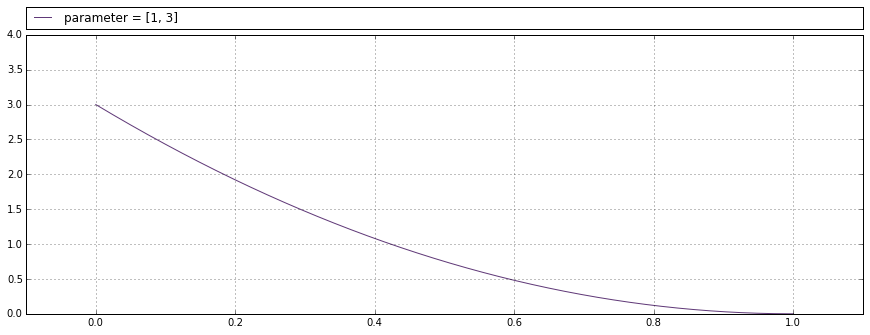

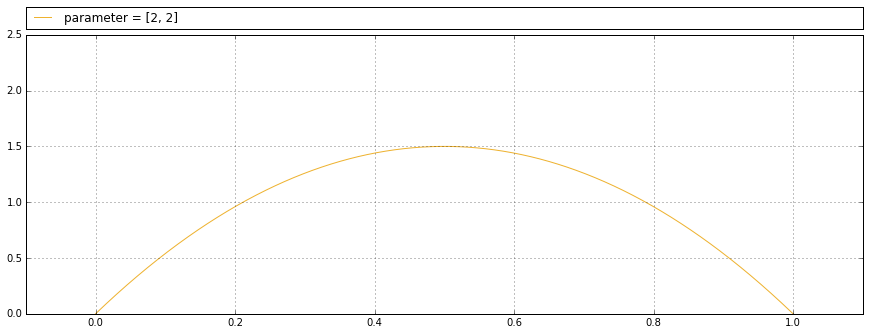

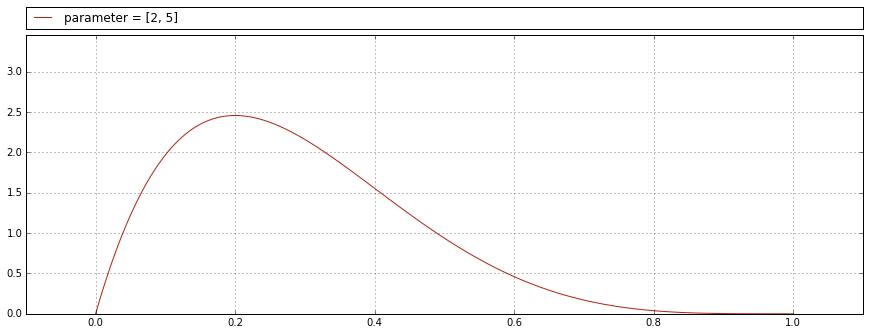

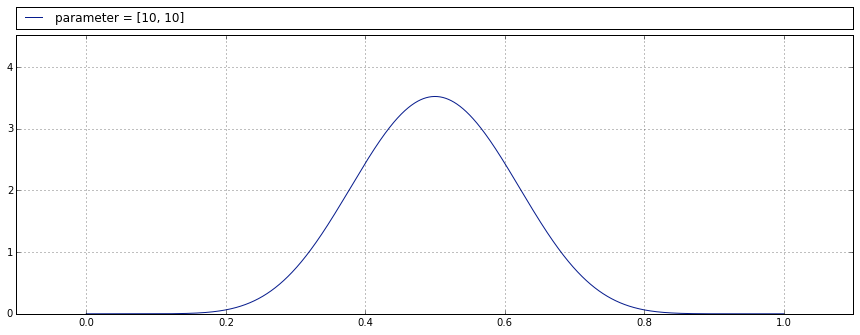

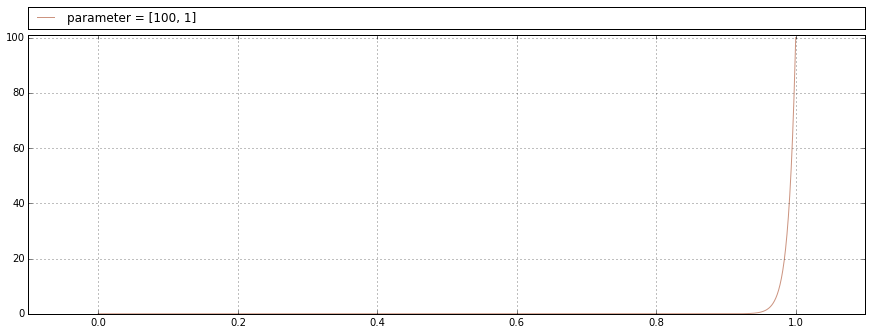

In [6]:
i = 0
for dist in beta_distr:
    to_draw = [dist.pdf(dot) for dot in dots]
    plt.figure(figsize=(15,5))
    plt.grid(True)
    plt.plot(dots, to_draw, color=color_generator(), label='parameter = ' + str(dists_parameters[i]))
    lim_y = np.max(to_draw)
    if(lim_y == np.inf) :
        lim_y = 10
    plt.ylim(0, lim_y + 1)
    plt.xlim(-0.1, 1.1)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    i = i + 1

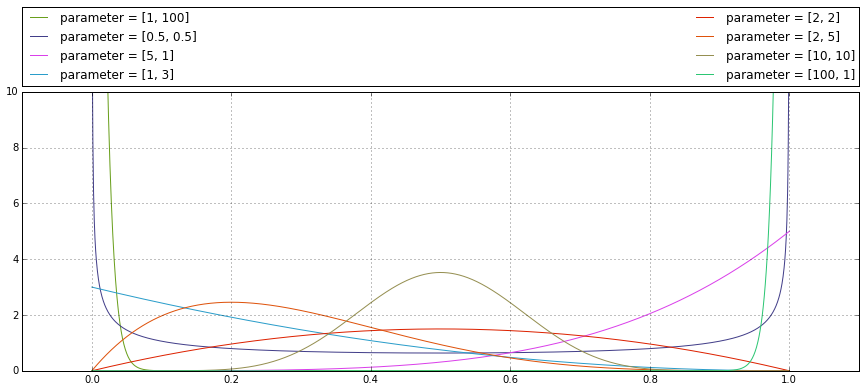

In [7]:
i = 0
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(0,10)
for dist in beta_distr:
    to_draw = [dist.pdf(dot) for dot in dots]
    plt.plot(dots, to_draw, color=color_generator(), label='parameter = ' + str(dists_parameters[i]))
    if(lim_y == np.inf) :
        lim_y = 10
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    i = i + 1

Зададим набор параметров $\theta$ для Бернуллиевского распределения

In [8]:
probs = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
bernoulli_dists = []
for p in probs:
    bernoulli_dists.append(scipy.stats.bernoulli(p))

Сгенерируем для каждого распределения по выборке из 20 элементов

In [11]:
selections = []
for dist in bernoulli_dists:
    selections.append(dist.rvs(20))

Взглянем, какие получились выборки

In [15]:
zip(selections, probs)

[(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0.01),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 0.1),
 (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]), 0.25),
 (array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]), 0.5),
 (array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]), 0.75),
 (array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]), 0.9),
 (array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 0.99)]

Сопряженным к Bern(p) является $Beta(\alpha, \beta)$

Априорные параметры - $\alpha,\, \beta\!$ 

А это апостериорные гиперпараметры	($\alpha + \sum_{i=1}^n x_i,\, \beta + n - \sum_{i=1}^n x_i\!$)

Чтобы оценить наш параметр $\theta$, нам необходимо найти условное математическое ожидание $E(\theta | X) = E(Beta(\alpha + \sum_{i=1}^n x_i,\, \beta + n - \sum_{i=1}^n x_i\!))$
А мы знаем, что математическое ожидание случайной величины распределенной как Beta($\alpha, \beta$), равно  $\frac {\alpha}{\alpha + \beta}$ 

Теперь напишем функцию, которая возвращает условное матожидание(Байесовскую оценку) в зависимости от различных параметров априорного распределения и выборки

In [16]:
def evaluate(alpha, beta, sums):
    return [(float(alpha) + sums[n]) / ((float(alpha) + float(sums[n])) + (float(beta) + float(n + 1) - float(sums[n])) ) for n in range(len(sums))]

В функции выше можно было сократить частичные суммы в знаменателе, но для понятности оставим

In [18]:
def draw_evals(evaluations):
    plt.figure(figsize=(15,5))
    for i in range(len(evaluations)):
        plt.plot(range(1, 21), evaluations[i], color=color_generator(), label= 'param = ' + str(dists_parameters[i]))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.grid(True, animated=True)



Напишем функцию, которая вычисляет все оценки для всех параметров априорного(Бета) распределения. Далее нарисуем график разности с $\theta$ и посмотрим, какой из параметров лучший

Так же добавим оценку максимального правдоподобия. Она равна выборочному среднему $\overline{X}$

In [20]:
def make_all_evals(selection):
    result = []
    for i in range(len(selection)):
        to_append = []
        for param in dists_parameters:
            to_append.append(evaluate(param[0], param[1], np.cumsum(selection[i])))
        result.append(to_append)
    return result

In [21]:
all_evals = make_all_evals(selections)

In [56]:
selections

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [63]:
def draw_all_evals(evals, theta_diff=False):
    MLE = []
    for k in range(len(selections)):
        sumka = np.cumsum(selections[k])       
        MLE.append([sumka[a] / float(a + 1.) for a in range(len(sumka))])
    for j in range(len(evals)):
        plt.figure(figsize=(15,5))
        if theta_diff :
            plt.plot(range(1,21), map(abs, np.array(MLE[j]) - probs[j]), '--', color=color_generator(), label='MLE')
        else :
            plt.plot(range(1,21), MLE[j], '--', color=color_generator(), label='MLE')
        for i in range(len(evals[j])):
            to_draw = np.array(evals[j][i])
            if(theta_diff):
                to_draw = map(abs, to_draw - probs[j])
            plt.plot(range(1, 21), to_draw, color=color_generator(), label= 'param = ' + str(dists_parameters[i]))
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
        plt.grid(True, animated=True)
        xlabel_str = 'For $\\theta$ = ' + str(probs[j])
        if(theta_diff):
            xlabel_str += ' with $\\theta$ diff'
        plt.xlabel(xlabel_str)
        plt.show()



# Теперь построим графики наших оценок

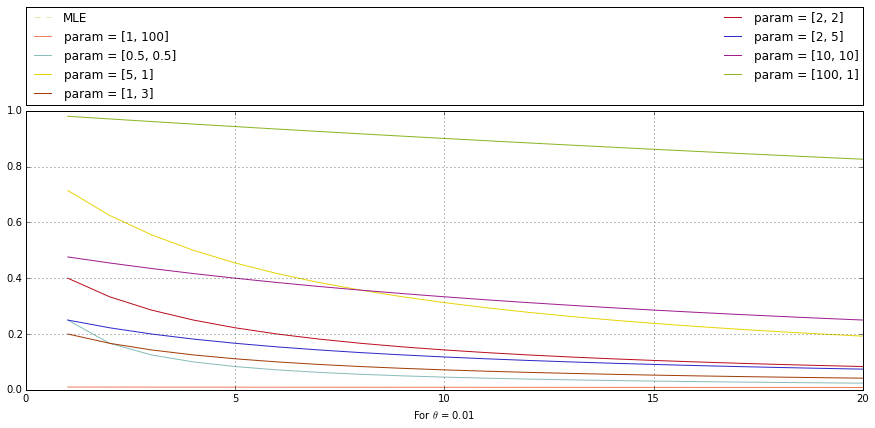

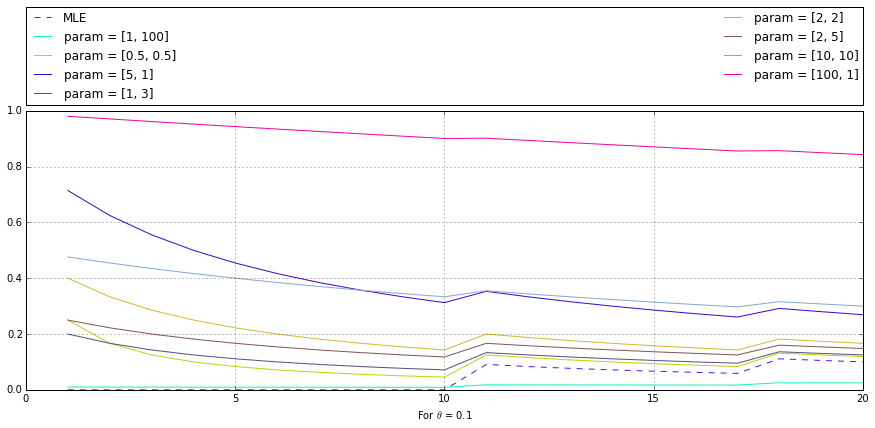

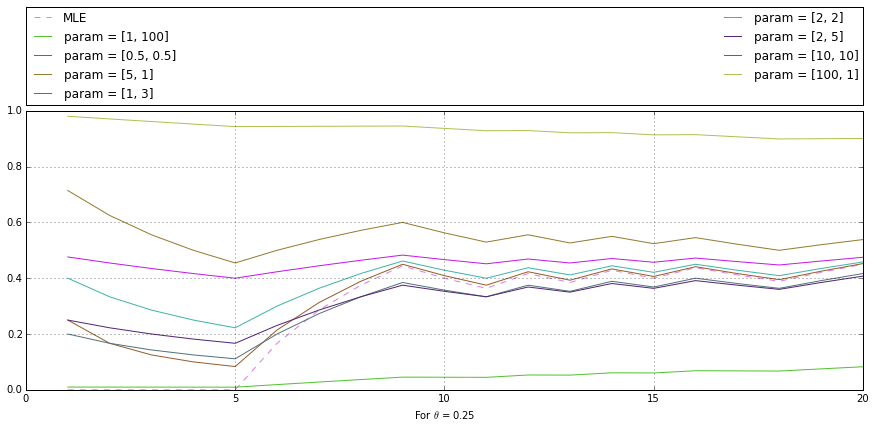

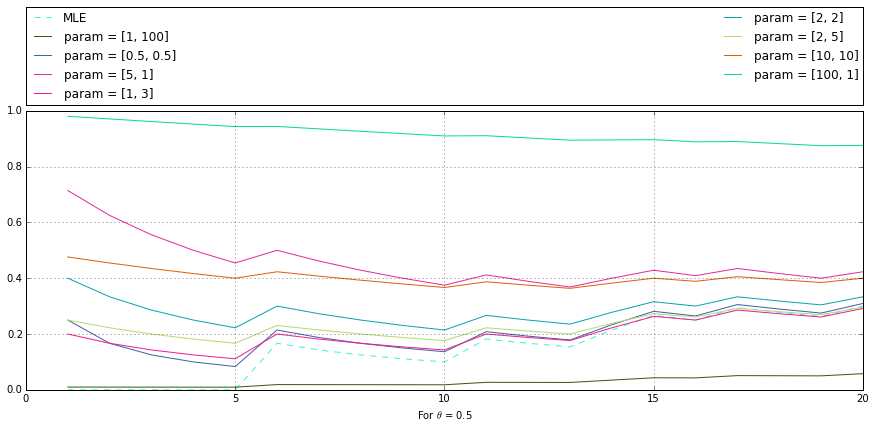

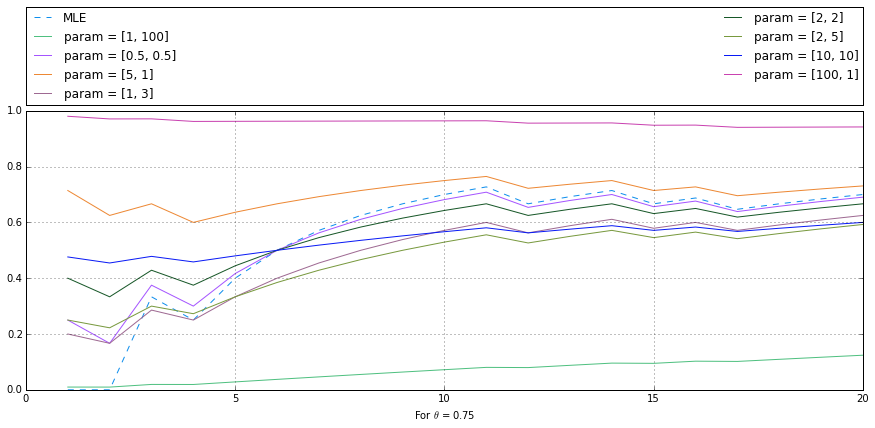

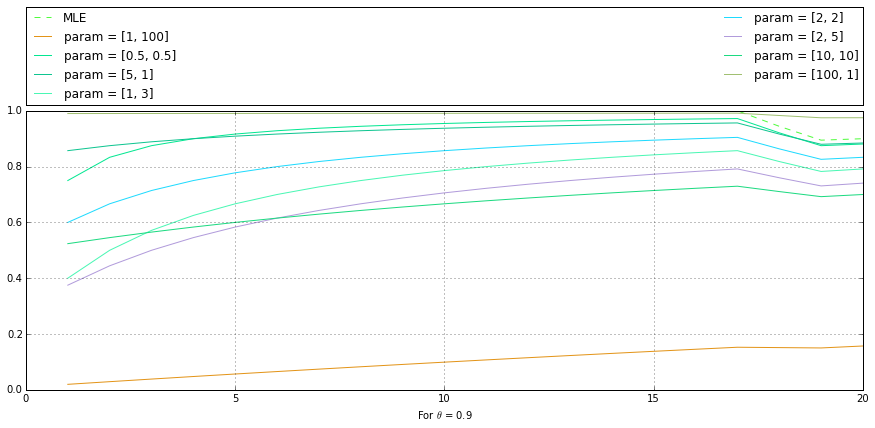

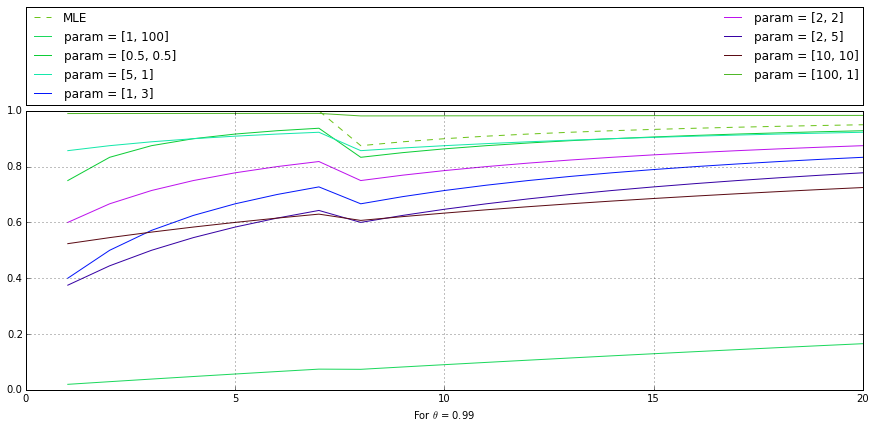

In [64]:
draw_all_evals(all_evals)

# Теперь построим графики модуля разности $|\hat{\theta} - \theta|$

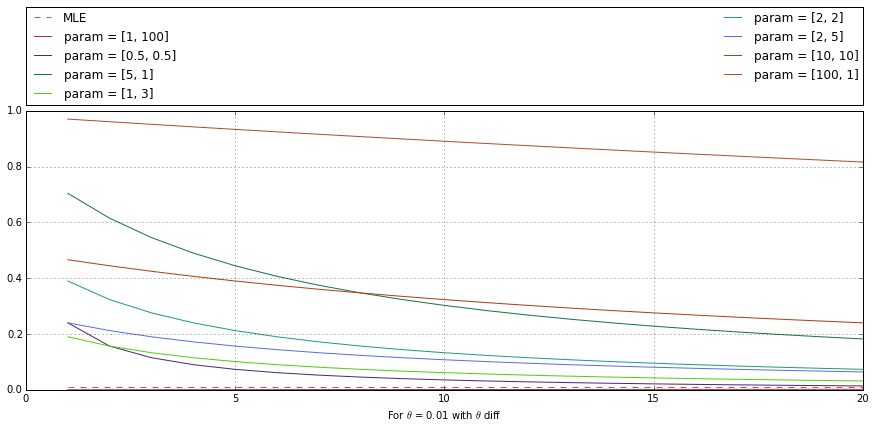

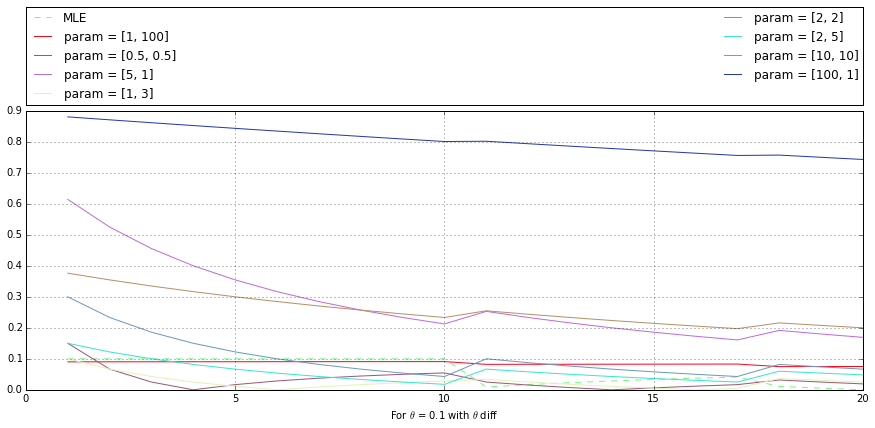

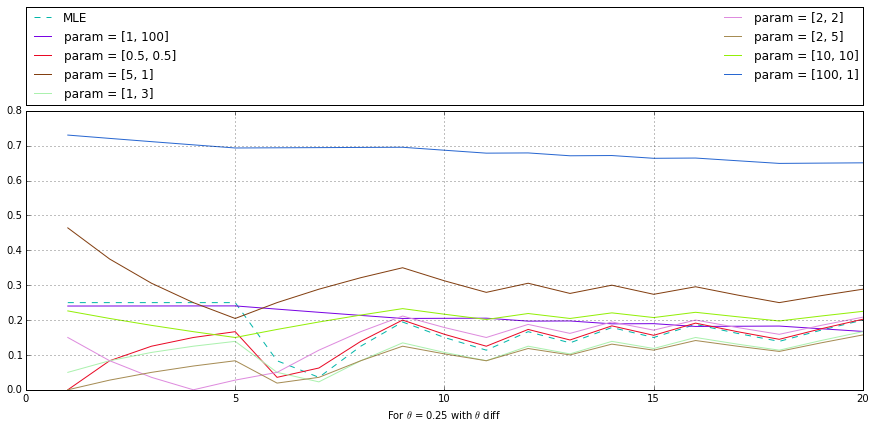

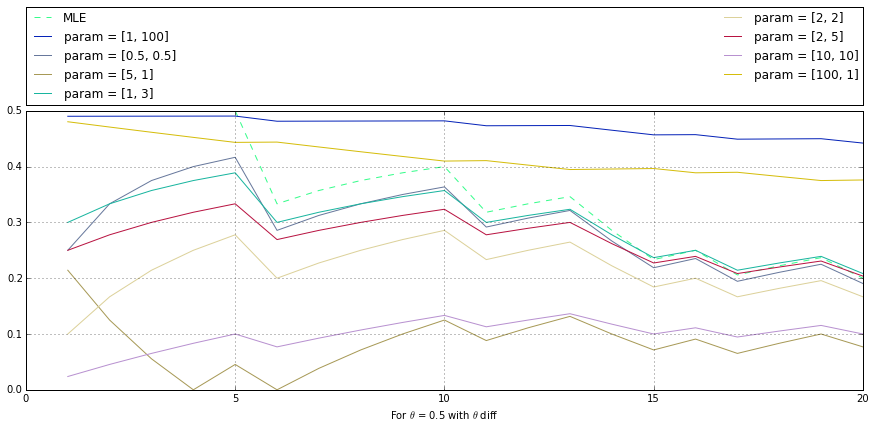

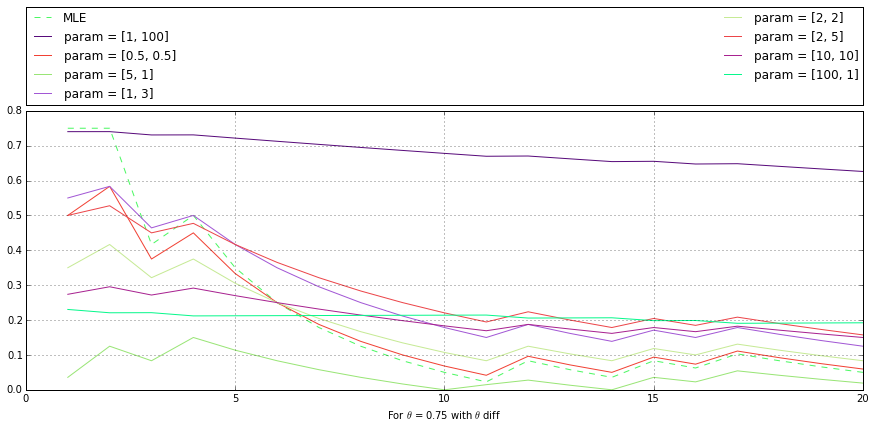

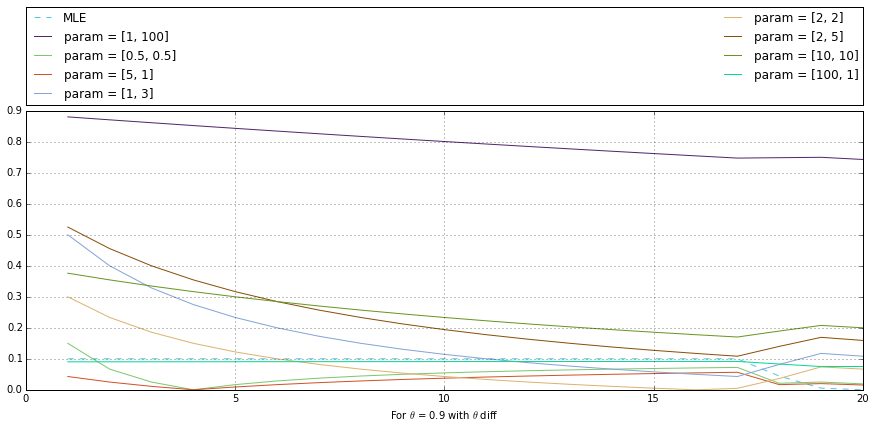

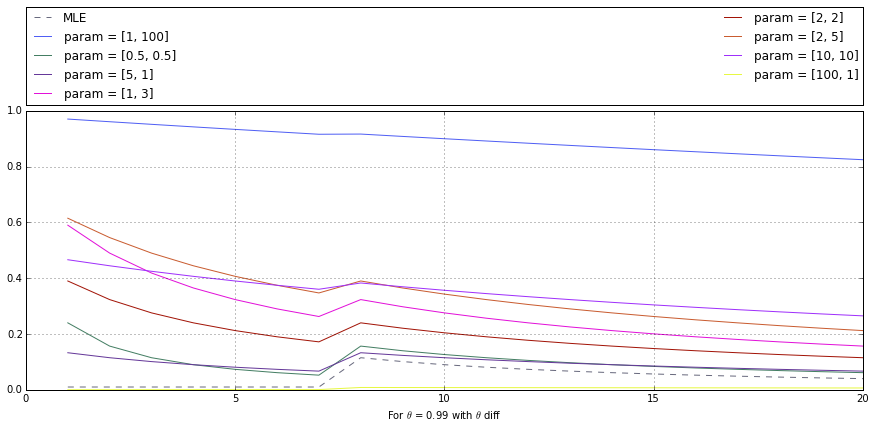

In [65]:
draw_all_evals(all_evals, True)

Для каждого из изначальных параметров $\theta$ в Бернуллиевской модели, хорошо работают различные параметры для априорного распределения, например, для тех случаев, когда $\theta$ близко к единице или нулю, подойдут такие параметры априорного, график плотности которых имеет выраженные максимумы в точке 1 и 0. про бернуллиевскую с вероятностью 0.5 сложно что-то сказать, т.к монетка может быть как честной(т.е. вероятности одинаковы) , так и часто давать перевес в одну из сторону. например Beta(10,10) и Beta(0.5,0.5)!!!